In [1]:
import pandas as pd 
import numpy as np 
import pyodbc

import warnings
warnings.filterwarnings('ignore')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-SEV5FUM;'
    'DATABASE=InstantSWSInternWeek1;'
    'Trusted_Connection=yes;'
)


In [5]:
conn = pyodbc.connect(conn_str)

In [7]:
query = "select * from dbo.shopping_trends"
df = pd.read_sql(query,conn)

In [9]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [11]:
df.shape

(3900, 19)

In [13]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [17]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


1. Convert Customer ID to object

In [22]:
df['Customer_ID'] = df['Customer_ID'].astype('object')

In [26]:
df['Customer_ID'].dtype

dtype('O')

2. Need to see how much of outliers in Age column since std + 44 = 60 while max is 70

<Axes: ylabel='Age'>

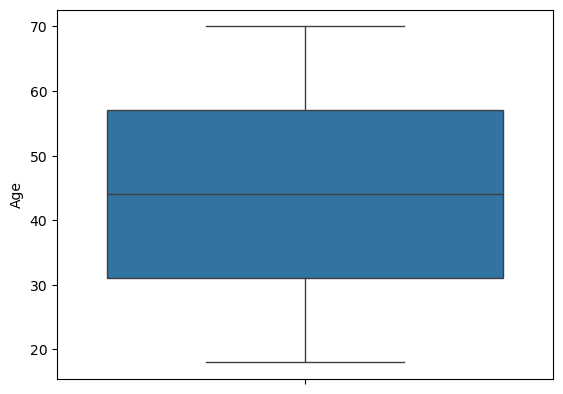

In [31]:
sns.boxplot(data=df['Age'])

<h3>Check Duplicates</h3>

In [33]:
df.duplicated().sum()

0

<h3>Check Missing Values</h3>

In [37]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

<h3>Get Values of Categorical columns</h3>

In [40]:
for col in df.select_dtypes('object').columns: 
    print(df[col].value_counts())
    print('\n')

Customer_ID
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: count, Length: 3900, dtype: int64


Gender
Male      2652
Female    1248
Name: count, dtype: int64


Item_Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New Y

<h3>Outliers</h3>

In [136]:
df.select_dtypes('int').columns

Index(['Age', 'Purchase_Amount_USD', 'Previous_Purchases'], dtype='object')

In [138]:
df.select_dtypes('float').columns

Index(['Review_Rating'], dtype='object')

--I will not consider age outliers since it is normal for this kind of business everyone wears clothes

<Axes: xlabel='Purchase_Amount_USD'>

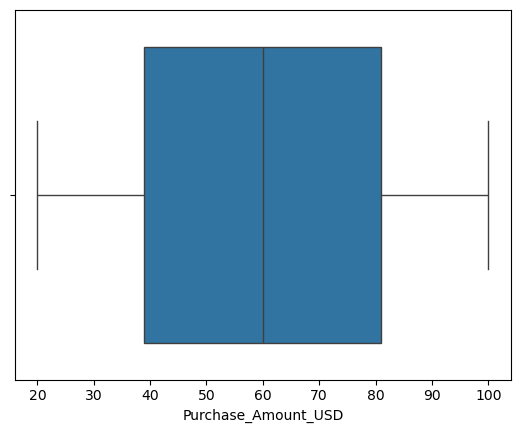

In [144]:
sns.boxplot(x=df['Purchase_Amount_USD'])

<Axes: xlabel='Previous_Purchases'>

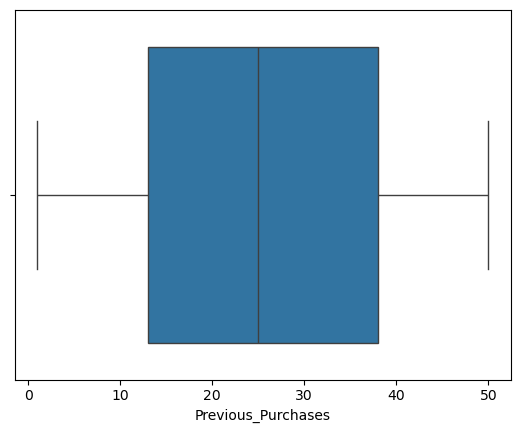

In [146]:
sns.boxplot(x=df['Previous_Purchases'])

<Axes: xlabel='Review_Rating'>

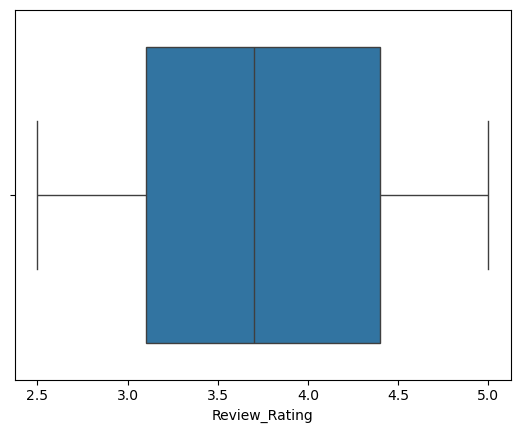

In [148]:
sns.boxplot(x=df['Review_Rating'])

In [46]:
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


<h3>Univariate Analysis</h3>

<Axes: xlabel='Age', ylabel='Count'>

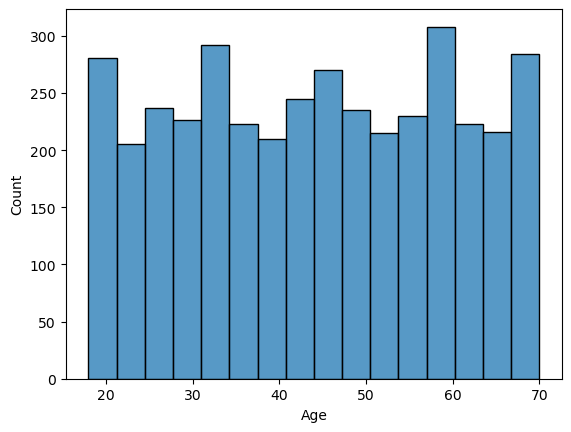

In [49]:
sns.histplot(data=df['Age'])

<Axes: ylabel='Gender'>

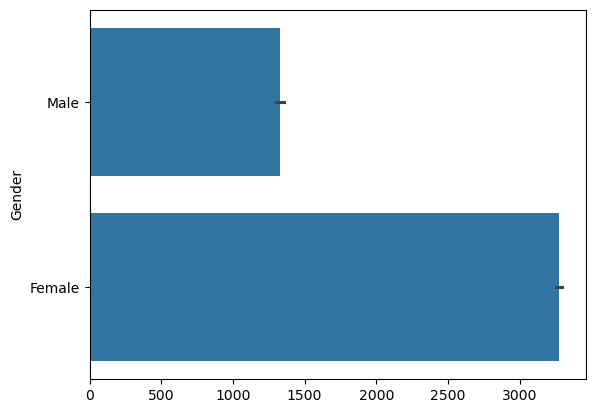

In [51]:
sns.barplot(data=df['Gender'])

In [53]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

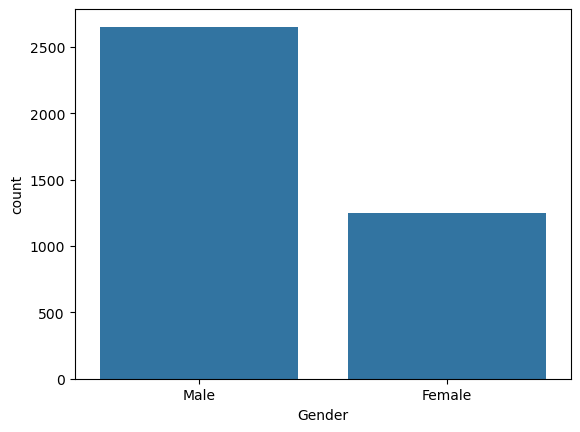

In [55]:
sns.countplot(data=df, x='Gender')

<Axes: xlabel='Gender'>

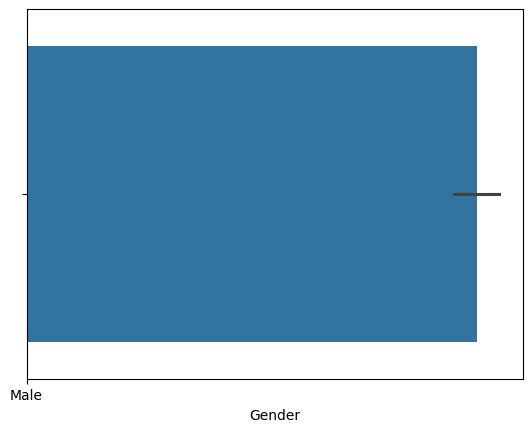

In [79]:
sns.barplot(data=df, x='Gender')

In [59]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: >

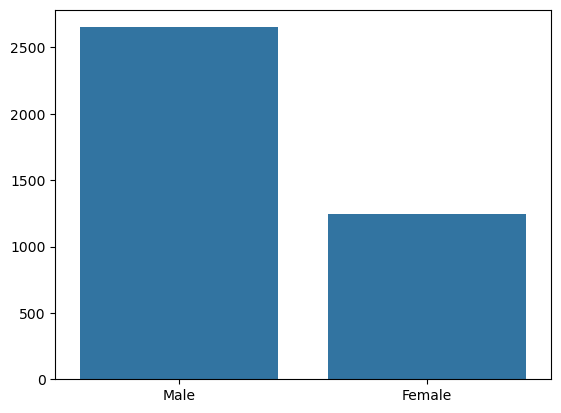

In [63]:
sns.barplot(x=['Male', 'Female'], y=[2652, 1248])

<Axes: ylabel='Gender'>

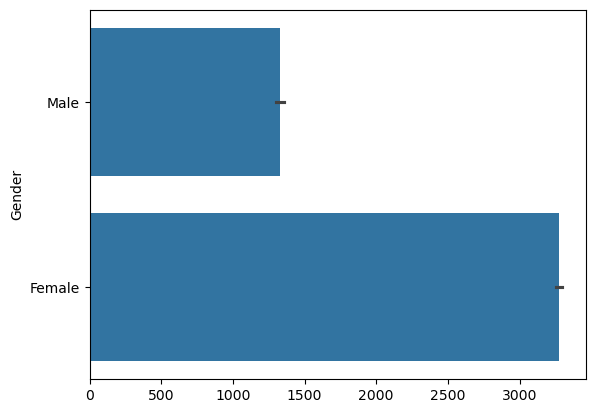

In [67]:
sns.barplot(data=df['Gender'])

In [69]:
df['Gender']

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
3895    Female
3896    Female
3897    Female
3898    Female
3899    Female
Name: Gender, Length: 3900, dtype: object

<Axes: ylabel='Category'>

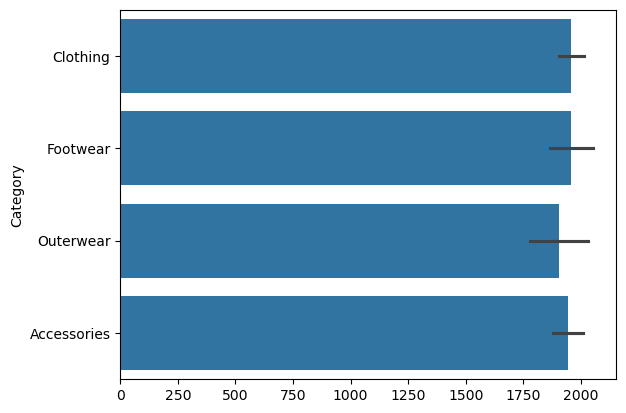

In [83]:
sns.barplot(data=df['Category'])

<Axes: ylabel='Item_Purchased'>

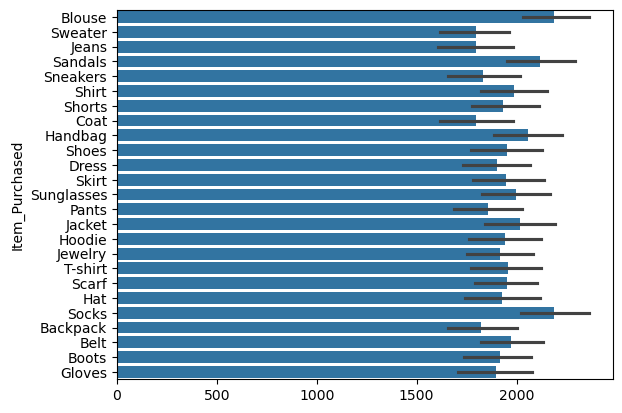

In [85]:
sns.barplot(data=df['Item_Purchased'])

<Axes: xlabel='Purchase_Amount_USD', ylabel='Count'>

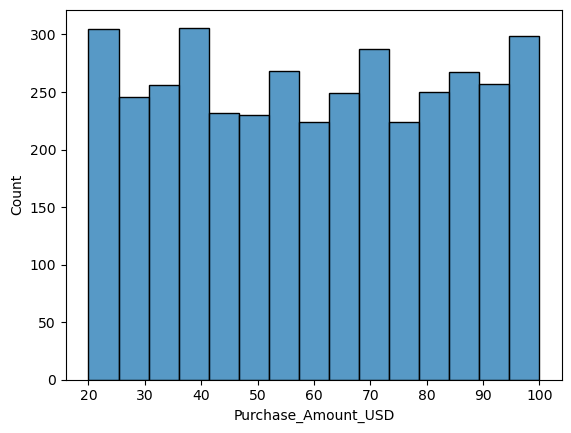

In [87]:
sns.histplot(data=df['Purchase_Amount_USD'])

<Axes: ylabel='Location'>

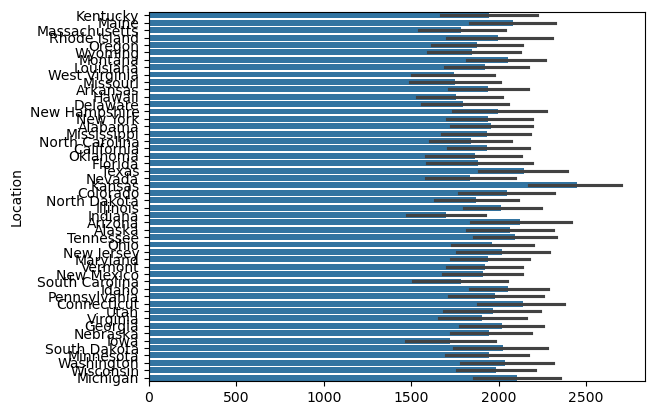

In [97]:
sns.barplot(data=df['Location'])

<Axes: ylabel='Payment_Method'>

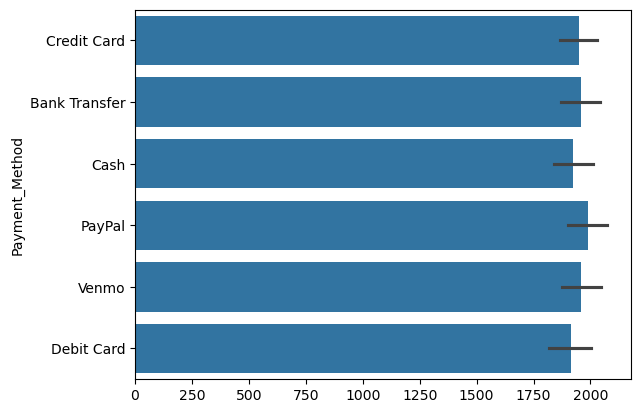

In [99]:
sns.barplot(data=df['Payment_Method'])

<Axes: ylabel='Size'>

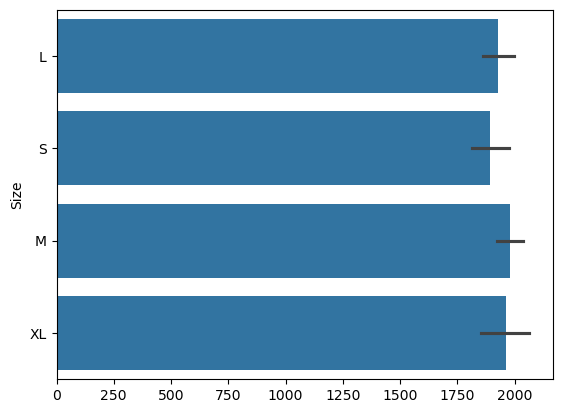

In [101]:
sns.barplot(data=df['Size'])

<Axes: ylabel='Color'>

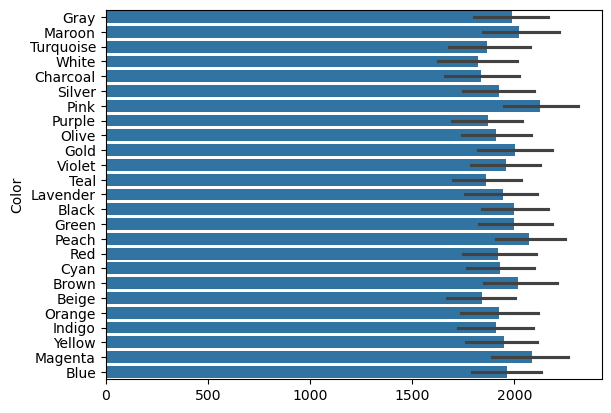

In [103]:
sns.barplot(data=df['Color'])

<Axes: ylabel='Season'>

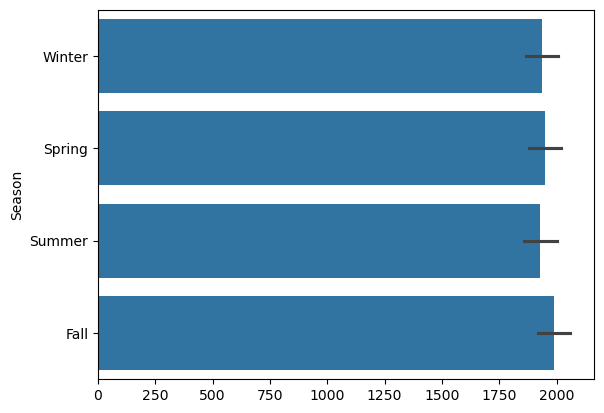

In [105]:
sns.barplot(data=df['Season'])

<Axes: ylabel='Shipping_Type'>

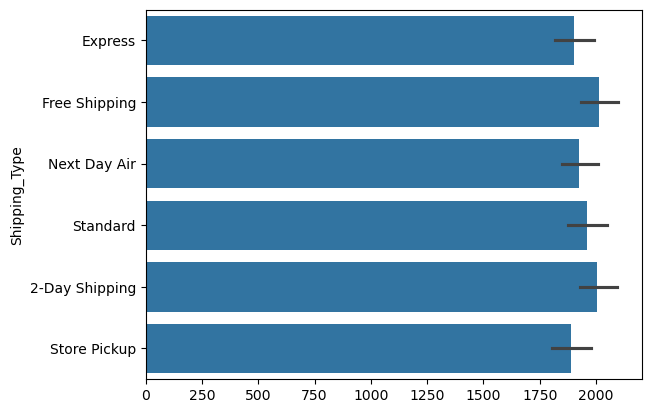

In [107]:
sns.barplot(data=df['Shipping_Type'])

<Axes: ylabel='Subscription_Status'>

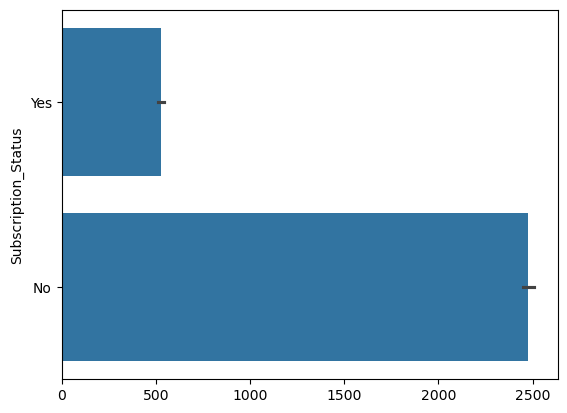

In [119]:
sns.barplot(data=df['Subscription_Status'])

In [113]:
df['Subscription_Status'].value_counts()

Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64

<Axes: xlabel='Review_Rating', ylabel='Count'>

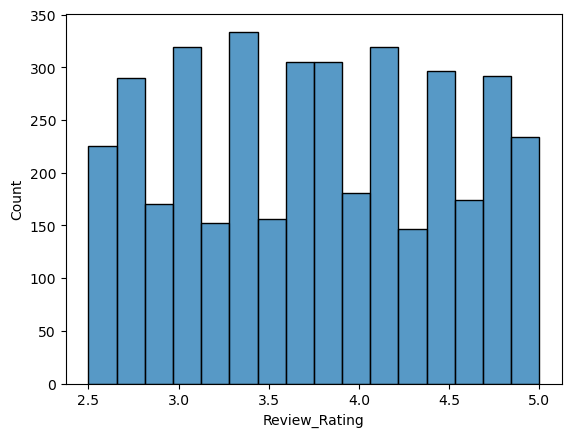

In [121]:
sns.histplot(data=df['Review_Rating'])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Fortnightly'),
  Text(1, 0, 'Weekly'),
  Text(2, 0, 'Annually'),
  Text(3, 0, 'Quarterly'),
  Text(4, 0, 'Bi-Weekly'),
  Text(5, 0, 'Monthly'),
  Text(6, 0, 'Every 3 Months')])

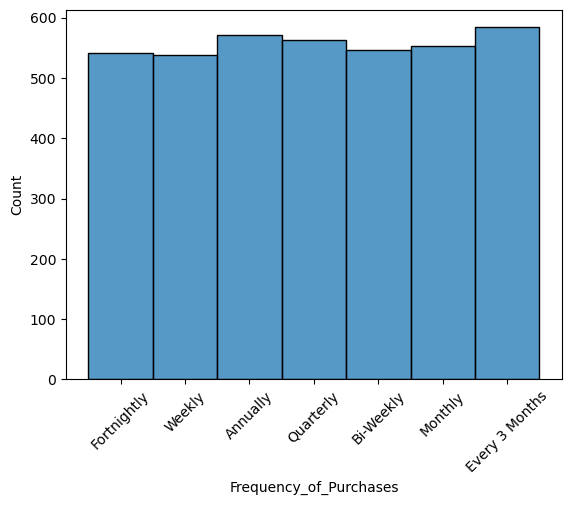

In [95]:
sns.histplot(data=df['Frequency_of_Purchases'])
plt.xticks(rotation=45)

<h3>Bivariate Analysis</h3>

In [124]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

<h1>Questions</h1>
1. Varitaion of sales among different seasons <hr>
2. which clothing category sells the most mainly, and with each season in another graph <hr>
3. which seasons have more discounts/promo codes <hr>
4. preffered payment methods with amounts purchased<hr>
5. preffered payment methods with freq of purchases<hr>
6. sales with shipping types/amount purchased per shipping type<hr>
7. and discounts with shipping types<hr>
8. and shipping types with freq of purchasing<hr>
9. how many subscriptions<hr>
10. subscriptions with freq of purchasing<hr>
11. subscriptions with paymed type<hr>
12. subscriptions with shipping type<hr>
13. visualize fav colors <hr>
14. visualize fav categories<hr>
15. visualize map for locations<hr>
16. how many of each gender is subscribed<hr>
17. from value counts why are male customers more? since this is a clothing brand mostly should be women<hr>

In [153]:
df.groupby('Season')['Purchase_Amount_USD'].mean()

Season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: Purchase_Amount_USD, dtype: float64

In [165]:
pd.crosstab(df['Season'], df['Category'])

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,324,427,136,88
Spring,301,454,163,81
Summer,312,408,160,75
Winter,303,448,140,80


In [169]:
df.groupby('Season')[['Discount_Applied', 'Promo_Code_Used']].count()

,Discount_Applied,Promo_Code_Used
Season,,
Fall,975,975
Spring,999,999
Summer,955,955
Winter,971,971


In [171]:
df.groupby('Season')['Discount_Applied'].count()

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Discount_Applied, dtype: int64

In [173]:
df.groupby('Season')['Promo_Code_Used'].count()

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Promo_Code_Used, dtype: int64

In [175]:
df.groupby('Payment_Method')['Purchase_Amount_USD'].mean()

Payment_Method
Bank Transfer    58.738924
Cash             59.927469
Credit Card      61.159483
Debit Card       58.638231
PayPal           58.697492
Venmo            61.241960
Name: Purchase_Amount_USD, dtype: float64

In [179]:
df.groupby('Payment_Method')['Frequency_of_Purchases']

Payment_Method
Bank Transfer    632
Cash             648
Credit Card      696
Debit Card       633
PayPal           638
Venmo            653
Name: Frequency_of_Purchases, dtype: int64

In [181]:
pd.crosstab(df['Payment_Method'], df['Frequency_of_Purchases'])

Frequency_of_Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Payment_Method,,,,,,,
Bank Transfer,101,92,95,90,87,82,85
Cash,109,95,119,85,84,82,74
Credit Card,80,101,102,106,115,104,88
Debit Card,94,79,90,85,85,108,92
PayPal,92,84,91,81,87,96,107
Venmo,96,96,87,95,95,91,93
